### $\textbf{Lab: LMS Algorithm (15 pts)}$

### Loading in Data

In [186]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [187]:
mat = scipy.io.loadmat('dataset.mat')

In [188]:
D = mat['D'].squeeze()
X = mat['X']

#### (a) (3pt) Directly compute the least square (Wiener) solution with the provided dataset. What is the optimal weight $W^*$? What is the MSE loss of the whole dataset when the weight is set to $W^*$?

In [189]:
W_star = ((np.linalg.inv(X.T @ X) @ X.T) @ D)
W_star

array([ 1.0006781 ,  1.00061145, -2.00031968])

The optimal weight $W^*$ is 
$$
\begin{bmatrix}
1.0006781 \\
1.00061145 \\
-2.00031968 \\
\end{bmatrix}
$$

We use the MSE as defined by the slides (that includes the 1/2 term, although one could obtain MSE as defined by Scikit Learn or other colloquial use by multiplying by 2

In [190]:
y_pred = np.array([(W_star.T @ X_k).item() for X_k in X])
print(f"MSE: {np.sum((D - y_pred) ** 2) / (2 * len(D))}")

MSE: 5.039951565868384e-05


The MSE loss of the whole dataset when the weight is set to $W^*$? is 0.00010079903131736768.

The 1/2 MSE loss of the whole dataset when the weight is set to $W^*$? is 5.039951565868384e-05

#### (b) (4pt) Now consider that you can only train with 1 pair of data point and target each time. In such case, the LMS algorithm should be used to find the optimal weight. Please initialize the weight vector as $W^0 = [0,0,0]^T$, and update the weight with the LMS algorithm. After each epoch (every time you go through all the training data and loop back to the beginning), compute and record the MSE loss of the current weight on the whole dataset. Run LMS for 20 epochs with learning rate $r=0.01$, report the weight you get in the end and plot the MSE loss in log scale vs. Epochs.

In [191]:
def descend(r, num_epochs, X = X, D = D):
  w_0 = np.array([0,0,0]).astype('float').T
  w_k = w_0.copy()
  mse_losses = []
  for i in range(num_epochs):
    for j in range(len(D)):
      X_k = X[j]
      d_k = D[j]
      s_k = w_k.T @ X_k
      w_k += r * X_k.T * (d_k - s_k)
    s_k = np.array([(w_k.T @ X_k).item() for X_k in X])
    mse_k = np.sum((D - s_k) ** 2) / (2 * len(D))
    mse_losses.append(mse_k)
    print(f"Epoch {i+1}: MSE = {mse_k} for Weights: {w_k}")
    print()
  return w_k, mse_losses

In [192]:
w_k, mse_losses = descend(r = 0.01, num_epochs = 20)

Epoch 1: MSE = 0.41597664653012956 for Weights: [ 0.64100742  0.60691145 -1.22256919]

Epoch 2: MSE = 0.06167050055591204 for Weights: [ 0.87171709  0.84503269 -1.69846199]

Epoch 3: MSE = 0.00918352302117239 for Weights: [ 0.95461479  0.93896791 -1.88341134]

Epoch 4: MSE = 0.0013998347202824953 for Weights: [ 0.98432452  0.97618831 -1.9552063 ]

Epoch 5: MSE = 0.00024727995925744576 for Weights: [ 0.99493404  0.99098913 -1.98305376]

Epoch 6: MSE = 7.804454112754207e-05 for Weights: [ 0.9987048   0.9968916  -1.99384948]

Epoch 7: MSE = 5.386768621940005e-05 for Weights: [ 1.00003676  0.99925083 -1.99803351]

Epoch 8: MSE = 5.069780261823408e-05 for Weights: [ 1.00050357  1.00019552 -1.99965493]

Epoch 9: MSE = 5.040083419088486e-05 for Weights: [ 1.00066553  1.00057433 -2.00028332]

Epoch 10: MSE = 5.042636577765125e-05 for Weights: [ 1.000721   1.0007264 -2.0005269]

Epoch 11: MSE = 5.045765692029332e-05 for Weights: [ 1.00073967  1.0007875  -2.00062135]

Epoch 12: MSE = 5.047309380

In [193]:
print(f'Final weights: {w_k}')

Final weights: [ 1.00074855  1.00082859 -2.00068123]


The final weight $W$ calculated after running the LMS algorithm for 20 epochs is 
$$
\begin{bmatrix}
1.0006781 \\
1.00061145 \\
-2.00031968 \\
\end{bmatrix}
$$

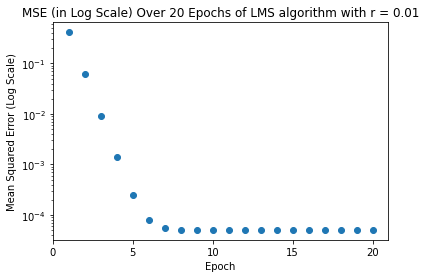

In [194]:
x_range = np.arange(1,21)
plt.gca().set_yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Log Scale)')
plt.scatter(x_range, mse_losses)
plt.title('MSE (in Log Scale) Over 20 Epochs of LMS algorithm with r = 0.01');
plt.xticks(np.arange(0,5) * 5);
plt.savefig('LogMSE01.png', dpi=300)

#### (c) (3pt) Scatter plot the points $(x_{1k}, x_{2k}, d_k)$ for all 100 data-target pairs in a 3D figure, and plot the lines corresponding to the linear models you got in (a) and (b) respectively in the same figure. Observe if the linear models fit the data well.

In [195]:
def regression_line(x, y):

  intercept = np.ones((100,100))
  return w_k[0] * intercept + w_k[1] * x + w_k[2] * y

x_1_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
x_2_range = np.linspace(min(X[:, 2]), max(X[:, 2]), 100)

X_1_grid, X_2_grid = np.meshgrid(x_1_range, x_2_range)
Z = regression_line(X_1_grid, X_2_grid)

In [196]:
x_1 = X[:, 1]
x_2 = X[:, 2]

In [197]:
z_1 = np.array(W_star @ [1,np.ravel(X_1_grid),np.ravel(X_2_grid)]).reshape((len(D), len(D)));
z_2 = np.array(w_k @ [1,np.ravel(X_1_grid),np.ravel(X_2_grid)]).reshape((len(D), len(D)));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


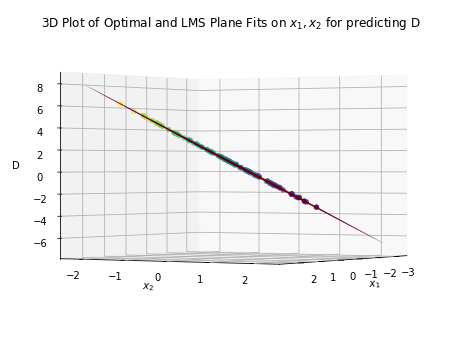

In [198]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, x_2, D, c=D);

surface1 = ax.plot_surface(X_1_grid, X_2_grid, z_1, color = 'purple')
surface2 = ax.plot_surface(X_1_grid, X_2_grid, z_2, color = 'red')

ax.view_init(0, 32)
#ax.legend(['Line for Optimal Weight', 'Line for LMS Weight'])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_zlabel('D');
plt.title('3D Plot of Optimal and LMS Plane Fits on $x_1, x_2$ for predicting D');

plt.savefig('3DPlot.png', dpi=300)

In general, it seems as though the line from the linear models in (a) and (b) fit the data well, as evidenced by the fact that the points hover on the line. There is almost no error at all among the points with the lines.

#### (d) (5pt) Learning rate $r$ is an important hyperparameter for the LMS algorithm, as well as for CNN optimization. Here, try repeat the process in (b) with $r$ set to 0.005, 0.05 and 0.5 respectively. Together with the result you got in (b), plot the MSE losses of the 4 sets of experiments in log scale vs. Epochs in one figure. Then try further enlarge the learning rate to $r=1$ and observe how the MSE changes. Base on these observations, comment on how learning rate affects the speed and quality of the learning process. (Note: The learning rate tuning for the CNN optimization will be introduced in Lecture 7.)

In [199]:
r_values = [0.005, 0.05, 0.5]

r = 0.005:

In [200]:
w_r0, mse_losses_r0 = descend(r = r_values[0], num_epochs = 20)

Epoch 1: MSE = 1.0914574469314475 for Weights: [ 0.39572422  0.36769911 -0.7493035 ]

Epoch 2: MSE = 0.4238335193030295 for Weights: [ 0.63515787  0.59991244 -1.2180853 ]

Epoch 3: MSE = 0.16470148146968697 for Weights: [ 0.77997143  0.74672493 -1.5112979 ]

Epoch 4: MSE = 0.06405756383186496 for Weights: [ 0.86751533  0.83963729 -1.6946606 ]

Epoch 5: MSE = 0.02494469825582346 for Weights: [ 0.92040793  0.8984913  -1.80930997]

Epoch 6: MSE = 0.009735815915366722 for Weights: [ 0.95234347  0.93580182 -1.88098685]

Epoch 7: MSE = 0.0038190313393249814 for Weights: [ 0.97161069  0.95947212 -1.9257939 ]

Epoch 8: MSE = 0.0015163915270170359 for Weights: [ 0.9832247   0.97449872 -1.95380211]

Epoch 9: MSE = 0.0006201613640342687 for Weights: [ 0.99021849  0.98404364 -1.97130891]

Epoch 10: MSE = 0.00027141973877162543 for Weights: [ 0.99442533  0.99010978 -1.98225151]

Epoch 11: MSE = 0.0001358346612416043 for Weights: [ 0.99695261  0.99396685 -1.98909119]

Epoch 12: MSE = 8.3220024373872

r = 0.05:

In [201]:
w_r1, mse_losses_r1 = descend(r = r_values[1], num_epochs = 20)

Epoch 1: MSE = 0.0001343152153154324 for Weights: [ 0.99714846  0.9979902  -1.98778352]

Epoch 2: MSE = 5.155166066921642e-05 for Weights: [ 1.00051928  1.00161346 -2.00154921]

Epoch 3: MSE = 5.165987134933783e-05 for Weights: [ 1.00053083  1.00163145 -2.0016281 ]

Epoch 4: MSE = 5.166048729053072e-05 for Weights: [ 1.00053087  1.00163155 -2.00162853]

Epoch 5: MSE = 5.1660490675274334e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 6: MSE = 5.1660490693847266e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 7: MSE = 5.1660490693949086e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 8: MSE = 5.166049069395016e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 9: MSE = 5.166049069395016e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 10: MSE = 5.166049069395016e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 11: MSE = 5.166049069395016e-05 for Weights: [ 1.00053087  1.00163155 -2.00162854]

Epoch 12: MSE = 

r = 0.5:

In [202]:
w_r2, mse_losses_r2 = descend(r = r_values[2], num_epochs = 20)

Epoch 1: MSE = 0.000929674006935538 for Weights: [ 0.97960556  0.98489055 -1.96602558]

Epoch 2: MSE = 0.0009022746388247147 for Weights: [ 0.97969493  0.98520792 -1.96669088]

Epoch 3: MSE = 0.0009022656803871786 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 4: MSE = 0.0009022656774304524 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 5: MSE = 0.0009022656774294065 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 6: MSE = 0.0009022656774294231 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 7: MSE = 0.0009022656774294733 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 8: MSE = 0.0009022656774294231 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 9: MSE = 0.0009022656774294733 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 10: MSE = 0.0009022656774294231 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 11: MSE = 0.0009022656774294733 for Weights: [ 0.97969496  0.98520802 -1.9666911 ]

Epoch 12: MSE = 0.00

Plot of MSE losses of 4 experiments in log scale vs Epochs:

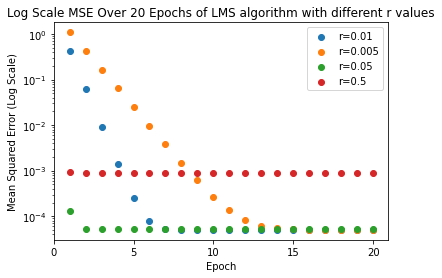

In [203]:
plt.scatter(x_range, mse_losses)
plt.scatter(x_range, mse_losses_r0)
plt.scatter(x_range, mse_losses_r1)
plt.scatter(x_range, mse_losses_r2)
plt.gca().set_yscale('log')
plt.legend(['r=0.01', 'r=0.005', 'r=0.05', 'r=0.5'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Log Scale)')
plt.xticks(np.arange(0,5) * 5);
plt.title('Log Scale MSE Over 20 Epochs of LMS algorithm with different r values');
plt.savefig('LogMSErvalues.png', dpi=300)

r = 1

In [204]:
w_r3, mse_losses_r3 = descend(r = 1, num_epochs = 20)

Epoch 1: MSE = 6.221473538428372e+18 for Weights: [ 2.44853746e+09 -7.82004386e+08 -2.54835788e+09]

Epoch 2: MSE = 4.037539197035097e+37 for Weights: [ 6.23762276e+18 -1.99213110e+18 -6.49190139e+18]

Epoch 3: MSE = 2.6202336516852733e+56 for Weights: [ 1.58902504e+28 -5.07492407e+27 -1.65380214e+28]

Epoch 4: MSE = 1.7004477366967381e+75 for Weights: [ 4.04801743e+37 -1.29282929e+37 -4.21303612e+37]

Epoch 5: MSE = 1.103536130595577e+94 for Weights: [ 1.03122637e+47 -3.29346322e+46 -1.07326463e+47]

Epoch 6: MSE = 7.1615961211223955e+112 for Weights: [ 2.62703369e+56 -8.39004812e+55 -2.73412554e+56]

Epoch 7: MSE = 4.647646559102238e+131 for Weights: [ 6.69232890e+65 -2.13735217e+65 -6.96514377e+65]

Epoch 8: MSE = 3.016173793245054e+150 for Weights: [ 1.70486074e+75 -5.44487257e+74 -1.77435992e+75]

Epoch 9: MSE = 1.957400210057157e+169 for Weights: [ 4.34310716e+84 -1.38707312e+84 -4.52015528e+84]

Epoch 10: MSE = 1.2702900578582652e+188 for Weights: [ 1.10640003e+94 -3.53354795e+9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


Based on these runs, the learning rate seems to clearly have great affect on both speed and quality of the learning process. In general, learning rates should likely be somewhat small (at least when further along within epochs), as that helps improve the speed and quality of the learning process. This is because in the cases of the 0.01 and 0.005 and 0.05 learning rates, they were both able to reduce the loss to 10^-4 within 20 epochs, as their small learning rates allowed them not to overstep the local minimum. This seems to be the case for the 0.5 learning rate, which clearly overstep the minima detected by the gradient and thus fails to decrease the error while stepping, and thus would take much longer to converge. However, in looking at the learning rates that converged, it seems as though the larger learning rate decreased faster. This is because it is able to make larger steps in the right direction early on, especially as the initial weights are not informed by any priors and thus there are large steps to make (whereas around the minima, smaller steps need to be made). This motivates the idea of a learning rate that decreases in size after a certain amount of epochs or that adapts based on the the epoch number or local gradient. The larger initial steps of the learning rate for 0.05 were helpful in decreasing the loss fast, but the 0.005 ends with a lower MSE as it is better able to make tiny steps as it nears the local minima. 